# Stock Market Data Analysis

---

In [3]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #ploting graphics
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/data/daily-historical-stock-prices-1970-2018'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


---

<b> start visualizing the data</b>

In [9]:
# Reading dataset and storing it in a dataframe
missing_values = ["n/a", "na", "--"]

stocks = pd.read_csv('../data/daily-historical-stock-prices-1970-2018/historical_stocks.csv',na_values = missing_values)

---

<b>Let's start with a small preview of the corresponding dataframe read previously; </b>

In [3]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
stocks.columns

Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

In [5]:
stocks.describe()

,ticker,exchange,name,sector,industry
count,6460,6460,6460,5020,5020
unique,6460,2,5462,13,136
top,SGRP,NASDAQ,BANK OF AMERICA CORPORATION,FINANCE,MAJOR PHARMACEUTICALS
freq,1,3308,16,1022,419


---

### Description of the columns
We realize there are 5 columns and this dataset:

- 'ticker' corresponds to the name of the share
- 'exchange' corresponds to the type of exchange made 
- 'name' refers the company's name
- 'sector' refers to the actual sector where the given company operates
- 'industry' specifies the type of services that can be provided

We also know that this dataset contains missing values :

> We have missing values on columns 'sector' and 'industry'

In [6]:
stocks.shape

(6460, 5)

In [10]:
index = stocks.index
number_of_rows = len(index)
print(number_of_rows)

6460


In [7]:
stocks['ticker'].unique().size

6460

> We realize there are 6460 entries to the table, where the unique identifiers are the share's names, meaning that a company's name can show up twice if it has, throughout the established period of time, changed the name of it's stocks. We will note that, for having to change the type of exchange, the companies also changed the name of the shares;

> One example of this is:

In [8]:
stocks[stocks['name'] == "1347 PROPERTY INSURANCE HOLDINGS, INC."]

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS


---


## Missing values treatment

#### The first step is to identify if the companies switched their share name; in the case they did, they can then contain the sector and industry present on another row

> Right now we have the following missing values:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1440
5. industry    1440

> In a 6459 rows × 5 columns matrix


> We want all rows that present null values, so we can obtain the names of the companies that do.

In [9]:
null_data = stocks[stocks.isnull().any(axis=1)]
null_data

,ticker,exchange,name,sector,industry
19,ABP,NASDAQ,ABPRO CORPORATION,NaN,NaN
42,SQZZ,NASDAQ,ACTIVE ALTS CONTRARIAN ETF,NaN,NaN
62,ACT,NASDAQ,ADVISORSHARES VICE ETF,NaN,NaN
100,ABDC,NASDAQ,ALCENTRA CAPITAL CORP.,NaN,NaN
124,SMCP,NASDAQ,ALPHAMARK ACTIVELY MANAGED SMALL CAP ETF,NaN,NaN
...,...,...,...,...,...
6393,WIA,NYSE,WESTERN ASSET/CLAYMORE U.S. TREASURY INFLATION...,NaN,NaN
6431,XFLT,NYSE,XAI OCTAGON FLOATING RATE & ALTERNATIVE INCOME...,NaN,NaN
6451,ZB^A,NYSE,ZIONS BANCORPORATION,NaN,NaN
6452,ZB^G,NYSE,ZIONS BANCORPORATION,NaN,NaN


> After Exploration, We realize that, by standard, all rows that do not have sector, do not have industry either and vice-versa.

### This function checks for companies that changed their ticker name

> If any did, we check if there are some other instances of that same company where the sector and industry information is present.

In [10]:
pd.options.mode.chained_assignment = None
names = null_data['name'].unique()

for companie in names:
    
    data = stocks[stocks['name'] == companie]
    
    for index,row in data.iterrows():
        
        if(not pd.isnull(row['sector'])):
            
            sector = row['sector']
            industry = row['industry']
            
            tmp = stocks[stocks['name'] == row['name']]
            tmp["sector"] = tmp["sector"].fillna(sector)
            tmp['industry'] = tmp['industry'].fillna(industry)
            stocks[stocks['name'] == row['name']] = tmp

In [11]:
stocks.isnull().sum()

ticker         0
exchange       0
name           0
sector      1018
industry    1018
dtype: int64

> After this operation, we remain with a 6459 rows × 5 columns matrix, but we have different numbers of missing values, respectively:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1018
5. industry    1018
6. dtype: int64

---

### In this part, all remaining missing values will be removed from the dataset, mainly for the reason that there is not sufficient information that allows us to fill these values, given the variety of sector and industries existant.
> We now have a 5442 rows × 5 columns matrix

In [11]:
bad_tickers = stocks[stocks.isnull().any(axis=1)]


stocks = stocks.dropna(how='any',axis=0) 
stocks.isnull().sum()

ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64

> Now we only have 5442 tickers

---

# Dataset exploration : Exploration Data Analysis

> Predominant sectors

> Predominant industries

> Types of stock exchanges on which we operate

In [12]:
stocks['name'].unique().size

4551

In [13]:
stocks['exchange'].value_counts()

NASDAQ    2855
NYSE      2587
Name: exchange, dtype: int64

The number of shares in each type of exchange is rather balanced, which is good for the purpose of ML.

<AxesSubplot:title={'center':'Types of exchanges'}>

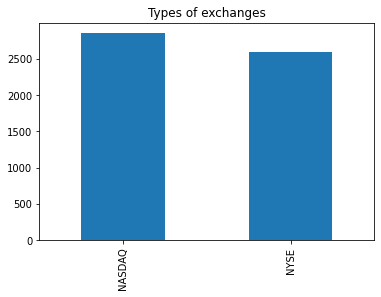

In [14]:
stocks['exchange'].value_counts().plot(kind='bar', title='Types of exchanges')

In [15]:
stocks['sector'].value_counts()

FINANCE                  1222
CONSUMER SERVICES         959
HEALTH CARE               784
TECHNOLOGY                609
CAPITAL GOODS             356
ENERGY                    295
PUBLIC UTILITIES          287
BASIC INDUSTRIES          276
CONSUMER NON-DURABLES     226
CONSUMER DURABLES         147
MISCELLANEOUS             142
TRANSPORTATION            138
SECTOR                      1
Name: sector, dtype: int64

In [16]:
stocks = stocks[stocks['sector'] != 'SECTOR']
stocks.shape
#remover a linha dummy

(5441, 5)

<AxesSubplot:title={'center':'Sectors'}>

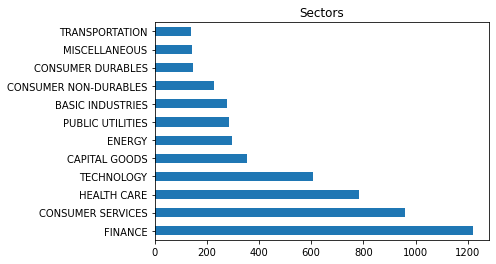

In [17]:
stocks['sector'].value_counts().plot(kind='barh', title='Sectors')

We realize the, throughout the dataset, the Finances sector dominates the sector column, up there with Consumer services and Health care. We can also consider technology, if we allow such leverage.

Text(0, 0.5, '')

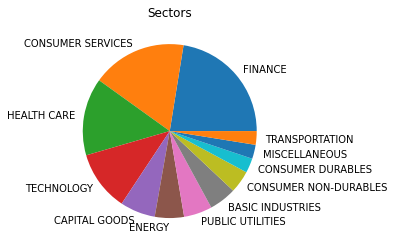

In [18]:
ax=stocks['sector'].value_counts().plot(kind='pie', title='Sectors', )
ax.set_ylabel('')

### Industry

In [19]:
stocks['industry'].value_counts()

MAJOR BANKS                                        444
MAJOR PHARMACEUTICALS                              419
REAL ESTATE INVESTMENT TRUSTS                      377
BUSINESS SERVICES                                  248
OIL & GAS PRODUCTION                               162
                                                  ... 
TOOLS/HARDWARE                                       1
GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS      1
DIVERSIFIED ELECTRONIC PRODUCTS                      1
CONSUMER: GREETING CARDS                             1
ELECTRONICS DISTRIBUTION                             1
Name: industry, Length: 135, dtype: int64

<AxesSubplot:>

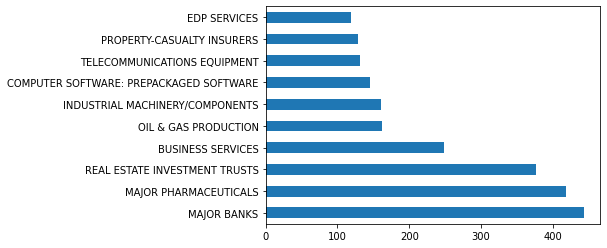

In [20]:
absolute_frequency_top10 = stocks['industry'].value_counts()[:10].copy()
absolute_frequency_top10 = absolute_frequency_top10.rename('')
absolute_frequency_top10.plot(kind='barh')

<AxesSubplot:>

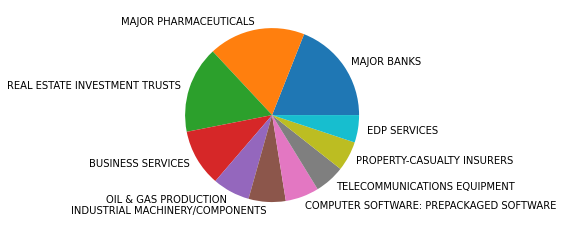

In [21]:
absolute_frequency_top10.plot(kind='pie')

## Let's dive down on the rate of changing in terms of share name.
### As we said earlier, a company with the same name can have several shares names changed through time.

In [22]:
dif_exchange_x_ticker_exchange = stocks.groupby(['name','sector','industry']).agg(ticker_exchange=('ticker','count'), exchange=('exchange','count'))
dif_exchange_x_ticker= stocks.groupby(['name','sector','industry']).agg(ticker_exchange=('ticker','count'))
change_on = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] >=2].sort_values(by='ticker_exchange', ascending=False).apply(lambda x : x-1)
change_off = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] < 2].apply(lambda x : x-1)

In [23]:
dif_exchange_x_ticker_exchange

,,,ticker_exchange,exchange
name,sector,industry,,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,1,1
"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,2,2
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,1,1
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,1,1
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,1,1
...,...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,1,1
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,1,1
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,1,1


In [24]:
dif_exchange_x_ticker_exchange[dif_exchange_x_ticker_exchange['exchange'] == dif_exchange_x_ticker_exchange['ticker_exchange']].count()

ticker_exchange    4554
exchange           4554
dtype: int64

By the operation above, we see that the number of ticker names and types of exchange are the same, which tells us, by knowing that there are not equal tickers in the dataset, that change to/from either type of exchange requires rebranding of the share, so we can simply identify it by the ticker, like we did priviously. We may also consider that the ticker name might be changed for marketing purposes and maintaining it's type of exchange.

It is worth noting that we will not include the type of exchange as we consider that it doesn't add information: **for now**,we do not have dates of these changes nor the info regarding if the shares still exist or not, so we cannot identify if there's some sort of shitf in favor of any of the types of exchange. So we won't be using type of exchange on the rest of this topic.

In [25]:
change_off

,,,ticker_exchange
name,sector,industry,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,0
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,0
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,0
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,0
"21VIANET GROUP, INC.",TECHNOLOGY,"COMPUTER SOFTWARE: PROGRAMMING, DATA PROCESSING",0
...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,0
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,0
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,0


In [26]:
change_on

,,,ticker_exchange
name,sector,industry,
BANK OF AMERICA CORPORATION,FINANCE,MAJOR BANKS,15
WELLS FARGO & COMPANY,FINANCE,MAJOR BANKS,14
PUBLIC STORAGE,CONSUMER SERVICES,REAL ESTATE INVESTMENT TRUSTS,13
BARCLAYS PLC,FINANCE,COMMERCIAL BANKS,12
CREDIT SUISSE AG,FINANCE,INVESTMENT BANKERS/BROKERS/SERVICE,11
...,...,...,...
BANK OF NEW YORK MELLON CORPORATION (THE),FINANCE,MAJOR BANKS,1
HOVNANIAN ENTERPRISES INC,CAPITAL GOODS,HOMEBUILDING,1
"HOSTESS BRANDS, INC.",CONSUMER NON-DURABLES,PACKAGED FOODS,1


We produced two distinct dataframes, grouped by the companies' names, sectors and industries,respectively, and contemplate the number of changes on ticker:
> The first one regards to the companies that did not make any changes, going by the name 'change_off'

> The second one regards to the companies that made name changes in the past, going by the name 'change_on'

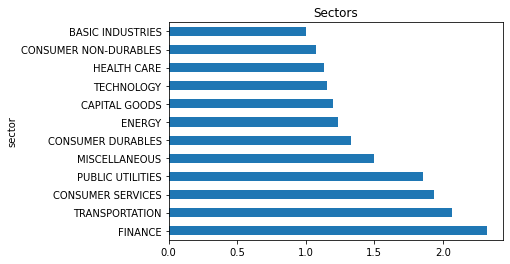

In [27]:
ax=change_on.groupby('sector').mean().sort_values(by='ticker_exchange',ascending=False).plot(kind='barh',y='ticker_exchange',legend=False, title ='Sectors')
#ax.set_ylabel('')

We identify that companies on the Finances sector show a mean higher regarding the rebranding of their tickers, followed closely by Transportation and Consumer Services

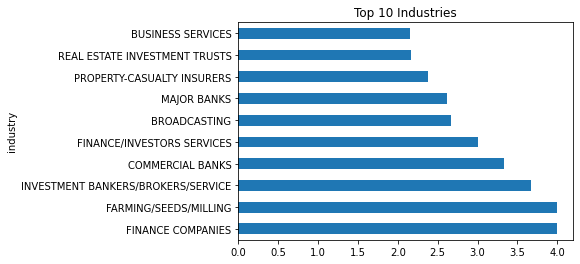

In [28]:
ax=change_on.groupby('industry').mean().sort_values(by='ticker_exchange',ascending=False)[:10].plot(kind='barh',y='ticker_exchange',legend=False, title ='Top 10 Industries')
#ax.set_ylabel('')

Industry wise, we can see that Finances show up big again, equal with Farming/Seeds/Milling. Investment Bankers/Brokers/Service follow right away.

<b>We conclude the the shallow analysis of the first component of the Stock Prices dataset. </b>

---

# Let's now explore the stock prices  : Exploration Data Analysis

---

In [4]:
stock_prices = pd.read_csv('../data/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv')
stocks_data = stock_prices.loc[(stock_prices['date']>='2017-01-01') & (stock_prices['date']<='2017-12-31')]
stocks_data

,ticker,open,close,adj_close,low,high,volume,date
6807,CRCM,8.59,8.37,8.370000,8.18,8.60,107500,2017-01-03
6813,CRCM,8.42,8.61,8.610000,8.39,8.65,85500,2017-01-04
6827,CRCM,8.59,8.55,8.550000,8.38,8.62,67000,2017-01-05
6835,CRCM,8.81,8.69,8.690000,8.50,8.81,136600,2017-01-06
6849,CRCM,8.64,8.70,8.700000,8.60,8.77,71800,2017-01-09
...,...,...,...,...,...,...,...,...
20973720,NZF,15.02,15.00,14.441445,14.97,15.02,261900,2017-12-22
20973721,NZF,15.03,15.04,14.479957,14.97,15.05,477600,2017-12-26
20973722,NZF,15.04,15.13,14.566607,15.04,15.14,281700,2017-12-27
20973723,NZF,15.15,15.23,14.662882,15.13,15.23,414800,2017-12-28


---

### Short explanation about the dataset

- 'ticker' corresponds to the name of the share
- 'open' describe the open price of that share in a specific day
- 'close' describe the final share price in the end of a day
- 'adj-close' it´s a tricky column, describes the adjusted price of a share, thats normally different from the close price
 > An example of this, is when a stock splits occur. 
A stock split it's a current way used for compannies to sell more stocks, by diving the price in (x), lets say x = 2, then if one share = 10€, then, when stock split occurs, let say with a split=2, the share is equal to 5€, but in the end this 2 shares represent the same as 1 share, e.g, imagine that the companny have 10 shares, if you buy 1 share you have 1% of the company, in a stock split(split=2), if you buy 2 shares you only have 1% of the comapnny two.

 > A stock's price is typically affected by supply and demand of market participants. However, some corporate actions, such as stock splits, dividends / distributions and rights offerings can affect a stock's price and adjustments are needed to arrive at a technically accurate reflection of the true value of that stock.

- 'low' is the lowest value paid for that share
- 'high' is the highest value paid for that share
- 'volume' of shares purchased in that day
- 'date' represents the date (year-month-day)

As we can notice by the table above, this dataset doesn't contain any missing value

In [5]:
stocks_data.describe()

,open,close,adj_close,low,high,volume
count,1.294034e+06,1.294034e+06,1.294034e+06,1.294034e+06,1.294034e+06,1.294034e+06
mean,6.868320e+01,6.884981e+01,6.803465e+01,6.775879e+01,6.978089e+01,9.524202e+05
std,2.256030e+03,2.284551e+03,2.284261e+03,2.228004e+03,2.313273e+03,3.345199e+06
min,7.000000e-03,7.000000e-03,2.908508e-03,7.000000e-03,7.000000e-03,1.000000e+00
25%,1.009000e+01,1.008000e+01,9.758174e+00,9.990000e+00,1.020000e+01,3.740000e+04
50%,2.155000e+01,2.154000e+01,2.076000e+01,2.127000e+01,2.180000e+01,1.732000e+05
75%,4.283000e+01,4.282000e+01,4.183122e+01,4.236000e+01,4.327000e+01,6.898000e+05
max,3.135000e+05,3.960000e+05,3.960000e+05,3.080000e+05,4.500000e+05,3.125568e+08


In [6]:
stocks_data["ticker"].unique().size

5470

In [7]:
stocks_data.isnull().sum()

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

In [11]:
# to check how many millions records we are handling here
index = stock_prices.index
number_of_rows = len(index)
print(number_of_rows)

20973889


> As mentioned earlier, the ticker is the key, is this case, a ticker represents a companny.

> In this dataset we have 5685 different tickers, in the previous dataset we had 5441 tickers, so we have to eliminate some tickers here.

> This opperation is quite long, maybe 5 minutes.
> Meanwhile go get a coffee :)

In [33]:
#Don't run this cell for now
'''
pd.options.mode.chained_assignment = None
tickers = bad_tickers['ticker'].unique()

ind = []

for index, row in stock_prices.iterrows():
    if(row['ticker'] in tickers):
        ind.append(index)
        
ind = np.asarray(ind)
stock_prices.drop(ind)
    

stock_prices["ticker"].unique().size
'''

'\npd.options.mode.chained_assignment = None\ntickers = bad_tickers[\'ticker\'].unique()\n\nind = []\n\nfor index, row in stock_prices.iterrows():\n    if(row[\'ticker\'] in tickers):\n        ind.append(index)\n        \nind = np.asarray(ind)\nstock_prices.drop(ind)\n    \n\nstock_prices["ticker"].unique().size\n'

---

# Correlation analysis

In [32]:
stocks_data.corr()

,open,close,adj_close,low,high,volume
open,1.000000,0.997216,0.997194,0.999901,0.995622,-0.002041
close,0.997216,1.000000,0.999990,0.997204,0.999593,-0.002032
adj_close,0.997194,0.999990,1.000000,0.997195,0.999572,-0.002034
low,0.999901,0.997204,0.997195,1.000000,0.995438,-0.002032
high,0.995622,0.999593,0.999572,0.995438,1.000000,-0.002044
volume,-0.002041,-0.002032,-0.002034,-0.002032,-0.002044,1.000000


>As we can expect, the adj_close isn't very corrolated with any feature.

## Let's check the rate of volumes and the mean,variance and standart deviation of the close price

### As we can notice, the close price is the key to a good trader. We want to build serveral machine learning algorithms that can accurately predict this column.

In [33]:
stock_close_mean = stocks_data.groupby(['ticker']).agg(Volume_of_trades=('volume','sum'), Count_Ticker=('ticker','count'),Mean_close =('close', 'mean'))
stock_close_var = stocks_data.groupby(['ticker']).agg(Var_close =('close', 'var'))
stock_close_std = stocks_data.groupby(['ticker']).agg(Std_close =('close', 'std'))

stocks_close = stock_close_mean.join(stock_close_var, how = 'left', lsuffix = 'ticker').join(stock_close_std, how = 'left', lsuffix = 'ticker')

In [34]:
stocks_close

,Volume_of_trades,Count_Ticker,Mean_close,Var_close,Std_close
ticker,,,,,
A,464546100,251,59.329681,44.445197,6.666723
AA,1037609100,251,38.301673,34.927833,5.909977
AABA,2815709200,251,56.491833,101.423326,10.070915
AAL,1473598500,251,47.490717,10.017731,3.165080
AAME,787600,230,3.622696,0.051567,0.227085
...,...,...,...,...,...
ZTR,29426300,251,12.523506,0.546252,0.739088
ZTS,676774300,251,61.130040,35.818687,5.984871
ZUMZ,126594800,251,16.888685,9.568150,3.093243


## As we can see by the table, some comapanies appear more than others.
### We will try to predict the close price for the companies how have more tickets/rows on the dataset, by other words, we are choosing the companies with more data, for more accurate predictions

In [35]:
stocks_close.describe()

,Volume_of_trades,Count_Ticker,Mean_close,Var_close,Std_close
count,5.470000e+03,5470.000000,5470.000000,5.467000e+03,5467.000000
mean,2.253134e+08,236.569287,96.913230,4.437497e+05,23.831350
std,6.798404e+08,46.446353,3165.150753,1.992651e+07,665.779872
min,5.000000e+02,1.000000,0.049289,1.379900e-05,0.003715
25%,1.120192e+07,251.000000,10.152162,5.370285e-01,0.732822
50%,4.867135e+07,251.000000,21.354761,3.159308e+00,1.777444
75%,1.813988e+08,251.000000,41.340090,1.613081e+01,4.016318
max,1.979526e+10,251.000000,228908.547009,1.047930e+09,32371.745803


In [36]:
stocks_close_top_10 = stocks_close['Count_Ticker'].sort_values(ascending = False)[:10].copy()
stocks_close_top_10 = stocks_close_top_10.rename('')
stocks_close_top_10

ticker
A       251
NM      251
NMZ     251
NMY     251
NMR     251
NMM     251
NMIH    251
NMI     251
NMFC    251
NLY     251
Name: , dtype: int64

----

## We want to predict the stock prices to a specific company.
### So the first step it's to make a dataframe with a unique ticker.

# Let's start by making an algorithm to predict the ajudsted close price of the NLY


In [37]:
def companny_stocks(ticker):
    return stocks_data[stocks_data["ticker"] == ticker]

df = companny_stocks("NLY")
df = df.drop(["ticker"],axis=1)
df[60:80]

,open,close,adj_close,low,high,volume,date
16261617,11.12,11.11,9.740015,11.07,11.15,4545100,2017-03-30
16261635,11.11,11.11,9.740015,11.08,11.18,6257800,2017-03-31
16261637,11.11,11.12,9.748782,11.09,11.18,7669500,2017-04-03
16261638,11.10,11.22,9.836451,11.10,11.24,6362400,2017-04-04
16261639,11.25,11.31,9.915353,11.20,11.32,11393900,2017-04-05
16261640,11.29,11.31,9.915353,11.25,11.34,8313600,2017-04-06
16261641,11.33,11.31,9.915353,11.25,11.33,6871200,2017-04-07
16261669,11.30,11.39,9.985489,11.28,11.40,6183800,2017-04-10
16261671,11.38,11.49,10.073156,11.36,11.49,8027900,2017-04-11
16261691,11.47,11.53,10.108225,11.47,11.56,7193400,2017-04-12


> Data corresponding to the company with the NLY ticker
> All rows are ordered by date, we can see that there are some hops, for example from 2017-04-26 to 2017-04-27, as we can see in the last two rows of this dataset, but these hops are derived from the wekends, where the trading market is closed and sometimes holidays.

In [38]:
df = df.drop(["date"],axis=1)

### This company have the NYSE Exhange ad is Sector is CAPITAL GOODS

In [39]:
stocks_data[stocks_data['ticker'] == 'NLY']

,ticker,open,close,adj_close,low,high,volume,date
16260827,NLY,10.02,10.08,8.602621,9.95,10.08,7868200,2017-01-03
16260829,NLY,10.09,10.11,8.628224,10.08,10.17,7589900,2017-01-04
16260847,NLY,10.12,10.22,8.722102,10.09,10.25,8130500,2017-01-05
16260849,NLY,10.20,10.27,8.764772,10.18,10.27,5738000,2017-01-06
16260871,NLY,10.26,10.22,8.722102,10.22,10.29,7013200,2017-01-09
...,...,...,...,...,...,...,...,...
16263571,NLY,12.07,12.05,11.093340,12.00,12.07,4462500,2017-12-22
16263589,NLY,12.06,12.08,11.120958,12.03,12.11,3769500,2017-12-26
16263591,NLY,12.09,12.10,11.139371,12.03,12.13,6169800,2017-12-27
16263611,NLY,11.81,12.02,11.347054,11.77,12.02,8490300,2017-12-28


### Some thoughs:

1. Make a short explanation about the columns -> Done

2. Check whats top10 tickers how have more volumes/trades on the market and take some concluisions about their sector/industry so we can have the first part of the dataset exploration consitent

3. Explore the Volume and Bets Column

4. Separate the stocks by ticker

4. Check if the date is consistent


---

# Machine Learning algorithms

---

First lets prepare the small dataset corresponding to the comapny NLY:

The adj_close price column it's the label column and the rest of the features are independent variables

Lets normalize all the variables, and then make a x_train and y_train

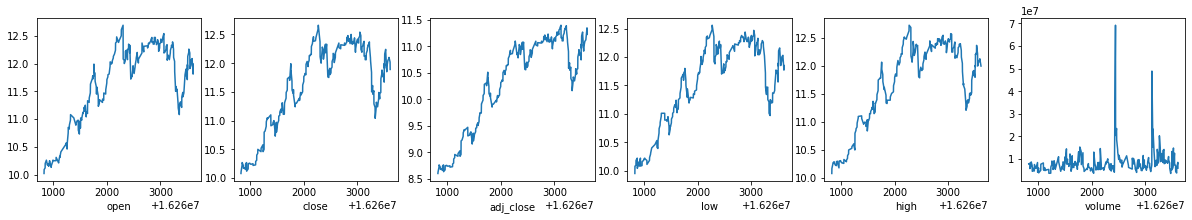

In [40]:
def show_distribution(df):
    plt.figure(figsize=(70, 3))
    i = 0
    
    for feature in df:
        plt.subplot(1, 20, i+1)
        plt.plot(df[feature])
        plt.xlabel(feature)
        i += 1
    plt.show()

show_distribution(df)

As we can see, all these distributions are very similar, but none of them is close to a normal distribution, so we will normalize the data using the min-max normalizer.

# Normalizing and splitting the data

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df) 


df_normalized = scaler.transform(df)

x = df_normalized[:,[0,1,3,4,5]]
y = df_normalized[:,[2]]

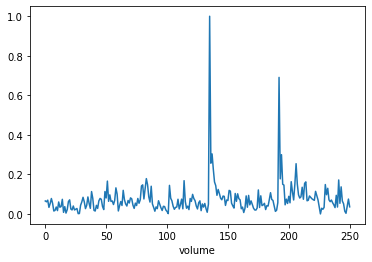

In [42]:
plt.plot(df_normalized[:,5])
plt.xlabel("volume")
plt.show()

# Spliting the data

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
      x, y, test_size = 0.2, random_state=2
    )

In [44]:
# Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:
print(x_train)

[[ 9.93012915e-01  9.64850204e-01  9.43679440e-01  8.83989517e-01
  -5.36498693e-01]
 [ 1.06660790e+00  1.03837264e+00  1.03252482e+00  9.86985304e-01
  -2.81023509e-02]
 [ 1.06660790e+00  9.79553849e-01  1.00290922e+00  9.57557535e-01
  -1.71437761e-01]
 [ 6.39758661e-01  6.70754866e-01  5.14263160e-01  6.78000750e-01
  -1.94267009e-02]
 [-5.81913357e-01 -5.05620873e-01 -5.51874347e-01 -5.87365230e-01
   4.22217595e-01]
 [-9.79325447e-01 -1.27026651e+00 -1.17378778e+00 -1.08762607e+00
  -1.46550202e-01]
 [-2.25934183e-02  1.11975689e-01  8.48468796e-02  4.53177602e-02
  -3.91707223e-02]
 [-2.17155891e+00 -2.16725336e+00 -2.16588770e+00 -2.17642824e+00
  -2.80314726e-01]
 [-1.61223897e+00 -1.57906549e+00 -1.54397427e+00 -1.63202716e+00
  -8.31405683e-01]
 [-2.23043462e+00 -2.19666345e+00 -2.19550189e+00 -2.26470874e+00
  -4.90727722e-01]
 [-1.58280182e+00 -1.75552185e+00 -1.72166362e+00 -1.67616741e+00
  -3.84927113e-01]
 [ 2.12909418e-01  1.56090831e-01  2.03306446e-01  1.63026028e-01

In [46]:
print(x_test)

[[-0.53775693 -0.52032592 -0.47783677 -0.57265135 -0.50008701]
 [-0.50831837 -0.3879833  -0.43341478 -0.48436944 -0.47363685]
 [-0.44944266 -0.24093703 -0.3445694  -0.30780704 -0.14015333]
 [ 0.2276287   0.33254719  0.29215183  0.26602041 -0.47362058]
 [ 0.84582434  0.92073506  0.95848724  1.06055192 -0.25060917]
 [ 0.90470005  0.7736888   0.86964186  0.95755754 -0.28013568]
 [-0.3611298  -0.24093703 -0.30014742 -0.30780704 -0.03392952]
 [-1.74470967 -1.69670306 -1.75127781 -1.79387567 -0.20322677]
 [-1.11179474 -0.99087762 -1.0701346  -1.08762607  0.06529517]
 [ 0.38953655  0.37666093  0.45503338  0.38372868  0.87359555]
 [-2.05380749 -2.03491074 -2.00300474 -2.08814634 -0.67263966]
 [ 1.21379788  0.9942589   1.12136879  1.22240184 -0.1465502 ]
 [ 0.84582434  0.86191627  0.91406384  0.76628125 -0.50440042]
 [ 0.2276287   0.17079588  0.20330645  0.1924538  -0.50138917]
 [ 0.88998078  0.89132637  0.88444966  0.8104229  -0.48302869]
 [-2.12740248 -2.03491074 -2.06223452 -2.13228659 -0.49

In [47]:
y_train.shape

(200, 1)

---

### Linear Regression

In [48]:
from sklearn import linear_model

regr_model = linear_model.LinearRegression(normalize = True)
regr_model = regr_model.fit(x_train, y_train)

print("Coefficient:" ,regr_model.coef_)

y_pred = regr_model.predict(x_test) 

print("Valores previstos: " , regr_model)
print("Valores previstos: " , y_pred)
print("Valores reais: " , y_test)

print("Score: " , regr_model.score(x_train,y_train))


Coefficient: [[ 0.12956343  0.33671545 -0.17910534 -0.00660386  0.0133235 ]]
Valores previstos:  LinearRegression(normalize=True)
Valores previstos:  [[0.46895773]
 [0.50914689]
 [0.55365227]
 [0.71220435]
 [0.86873193]
 [0.84304677]
 [0.55855344]
 [0.15657654]
 [0.35315879]
 [0.73603481]
 [0.04342375]
 [0.91230909]
 [0.85544514]
 [0.67376872]
 [0.87636633]
 [0.04710996]
 [0.90525768]
 [0.87406009]
 [0.69900806]
 [0.46836652]
 [0.61177618]
 [0.87952678]
 [0.87914083]
 [0.10725698]
 [0.76363122]
 [0.91396712]
 [0.40579416]
 [0.88526671]
 [0.03442484]
 [0.6810487 ]
 [0.03520836]
 [0.90369221]
 [0.33553806]
 [0.52127748]
 [0.45735443]
 [0.6688324 ]
 [0.78068646]
 [0.09768818]
 [0.40168815]
 [0.78400483]
 [0.05519768]
 [0.90744602]
 [0.48592445]
 [0.92403949]
 [0.87803323]
 [0.68412218]
 [0.93379813]
 [0.13908203]
 [0.91260622]
 [0.6597248 ]
 [0.6632587 ]]
Valores reais:  [[0.46661482]
 [0.49484979]
 [0.52622099]
 [0.83528293]
 [0.8698105 ]
 [0.93411283]
 [0.70680385]
 [0.12826613]
 [0.274

> compare the actual output values for **X_test** with the predicted

In [49]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

result

,Actual,Predicted
0,0.466615,0.468958
1,0.494850,0.509147
2,0.526221,0.553652
3,0.835283,0.712204
4,0.869810,0.868732
5,0.934113,0.843047
6,0.706804,0.558553
7,0.128266,0.156577
8,0.274856,0.353159
9,0.750850,0.736035


>comparison result as a bar graph using the below script

>**Note**: As the number of records is huge, for representation purpose we use just 30 records.

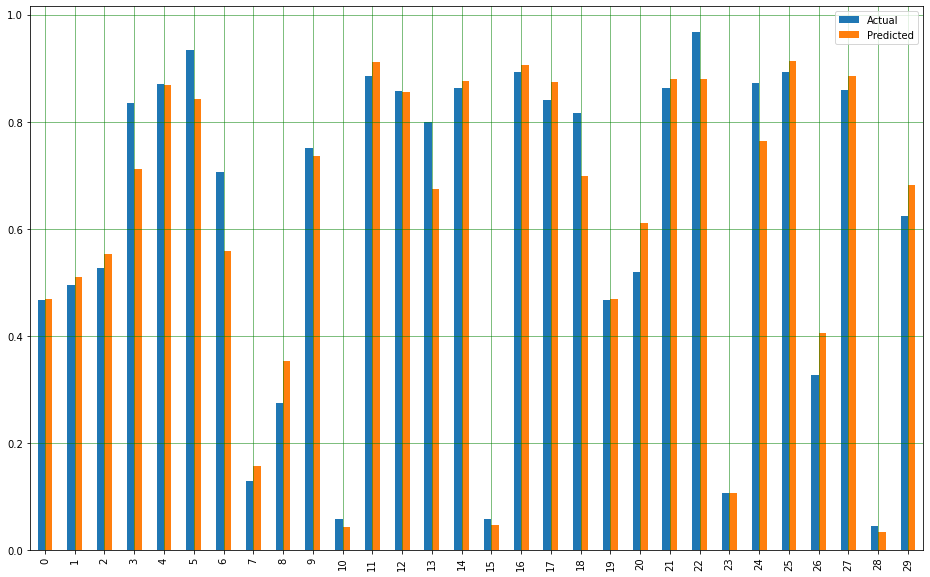

In [50]:
result1 = result.head(30)
result1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.050774921290281425
Mean Squared Error: 0.004817830878133622
Root Mean Squared Error: 0.06941059629576468


---

## Regressor GRU(Gated Recurrent Unit)</b>

In [40]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional, LSTM
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import keras

In [41]:
timesteps = 60

In [42]:
# All symbols
symbols = stocks_data.ticker.unique()

In [43]:
def make_train_set(data,s):
    l = len(data)
    for i in range(timesteps, l):
        x = data[i-timesteps: i, 0]
        y = data[i,0]
        
        x = x.reshape(-1,1)
        y = y.reshape(-1,1)
        
        sc = MinMaxScaler(feature_range=(0,1))
        sc.partial_fit(x)
        sc.partial_fit(y)

        train_set[s]['x'].append(sc.transform(x))
        train_set[s]['y'].append(sc.transform(y))

In [44]:
# Define train_set
train_set = {}
for s in ['A', 'NLY', 'NM', 'NMZ', 'NMY']:  
    train_set.update({s:{'x':[],'y':[]}})
    data = stocks_data.loc[stocks_data['ticker'] == s][['close']].values
    
    make_train_set(data,s)

In [45]:
# Define earlystopping callback function
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, mode='min', restore_best_weights=True)

In [46]:
def make_gru_network():
    regressorGRU = Sequential()
    # First GRU layer with Dropout regularisation
    
    regressorGRU.add(GRU(units = 30, return_sequences = False, input_shape=(60,1), activation='tanh'))
    regressorGRU.add(Dropout(0.3))
    
    # The output layer
    regressorGRU.add(Dense(units=1))
    return regressorGRU

In [47]:
# Training multi symbols model
model = make_gru_network()
model.compile(optimizer='rmsprop', loss='mean_squared_error')

for s in train_set:
    print ("Training {}".format(s))
    X_train, Y_train = np.array(train_set[s]['x']), np.array(train_set[s]['y'])
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
    Y_train = Y_train.reshape(Y_train.shape[0])

    print(X_train.shape, Y_train.shape)
    model_history= model.fit(X_train, Y_train, epochs = 20, batch_size = 60, 
                                    validation_split = 0.3,callbacks=[es])

Training A
(191, 60, 1) (191,)
Epoch 1/20
3/3 [==============================] - 2s 172ms/step - loss: 1.4578 - val_loss: 0.8556
Epoch 2/20
3/3 [==============================] - 0s 28ms/step - loss: 1.0560 - val_loss: 0.6651
Epoch 3/20
3/3 [==============================] - 0s 30ms/step - loss: 0.8349 - val_loss: 0.5204
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 0.6440 - val_loss: 0.4083
Epoch 5/20
3/3 [==============================] - 0s 30ms/step - loss: 0.4925 - val_loss: 0.3067
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 0.4123 - val_loss: 0.2165
Epoch 7/20
3/3 [==============================] - 0s 31ms/step - loss: 0.2860 - val_loss: 0.1452
Epoch 8/20
3/3 [==============================] - 0s 32ms/step - loss: 0.1899 - val_loss: 0.0894
Epoch 9/20
3/3 [==============================] - 0s 29ms/step - loss: 0.1118 - val_loss: 0.0508
Epoch 10/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0706 - val_loss: 0.03

3/3 [==============================] - 0s 33ms/step - loss: 0.0244 - val_loss: 0.0171
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0250 - val_loss: 0.0202
Epoch 5/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0207 - val_loss: 0.0145
Epoch 6/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0258 - val_loss: 0.0127
Epoch 7/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0279 - val_loss: 0.0167
Epoch 8/20
3/3 [==============================] - 0s 38ms/step - loss: 0.0221 - val_loss: 0.0184
Epoch 9/20
3/3 [==============================] - 0s 35ms/step - loss: 0.0269 - val_loss: 0.0158
Epoch 10/20
3/3 [==============================] - 0s 40ms/step - loss: 0.0244 - val_loss: 0.0130
Epoch 11/20
3/3 [==============================] - 0s 40ms/step - loss: 0.0227 - val_loss: 0.0192


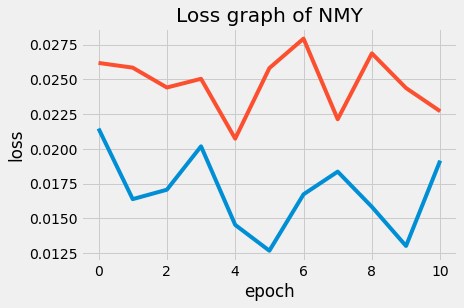

In [48]:
# Plotting validation val loss and loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss graph of {}'.format(s))
plt.show()

<b>Testing method 1</b>

In [49]:
# Test a particular symbol by using Test data
s = "NLY"
test_close_values = stocks_data.loc[stocks_data['ticker'] == s][['close']].values

In [50]:
def make_test_set(s, data):
    l = len(data)
    scaler = []
    test_set = {'x':[], 'y':[]}
    y_true = []
    
    for i in range(timesteps, l):
        x = data[i-timesteps: i, 0]
        y = data[i,0]
        y_true.append(y)

        x = x.reshape(-1,1)
        y = y.reshape(-1,1)

        sc = MinMaxScaler(feature_range=(0,1))
        sc.partial_fit(x)
        sc.partial_fit(y)

        scaler.append(sc)

        test_set['x'].append(sc.transform(x))
        test_set['y'].append(sc.transform(y))
        
    return test_set, y_true, scaler

In [51]:
def make_prediction(s, data):
    test_set, y_true, scaler = make_test_set(s, data)
    X_test = np.array(test_set['x'])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
    result = model.predict(X_test)
    y_pred = []
    for i in range(0,len(result)):
        y = result[i]
        y = y.reshape(-1,1)
        k = scaler[i].inverse_transform(y)
        y_pred.append(k[0][0])
    return y_true, y_pred

In [52]:
y_true, y_pred = make_prediction(s, test_close_values)

In [53]:
y_pred

[11.10924,
 11.061126,
 11.023451,
 11.007016,
 11.038909,
 11.108176,
 11.165342,
 11.200166,
 11.242704,
 11.30423,
 11.366861,
 11.440042,
 11.525665,
 11.594816,
 11.610935,
 11.594823,
 11.59274,
 11.594804,
 11.592412,
 11.603185,
 11.6835575,
 11.707916,
 11.717787,
 11.666686,
 11.5521345,
 11.441834,
 11.395613,
 11.359702,
 11.276967,
 11.226476,
 11.213561,
 11.240914,
 11.277486,
 11.3054285,
 11.363065,
 11.399091,
 11.431797,
 11.490251,
 11.55757,
 11.63275,
 11.689379,
 11.726592,
 11.73424,
 11.790104,
 11.856771,
 11.900597,
 11.893555,
 11.884602,
 11.901349,
 11.959083,
 11.995576,
 12.02682,
 12.055566,
 12.109471,
 12.174473,
 12.227717,
 12.286549,
 12.297731,
 12.288934,
 12.304954,
 12.368787,
 12.445734,
 12.398273,
 12.244059,
 12.066945,
 11.96554,
 11.987283,
 12.066402,
 12.118181,
 12.096549,
 12.10071,
 12.131256,
 12.183224,
 12.174875,
 12.194899,
 12.196139,
 12.0293,
 11.858243,
 11.745573,
 11.729159,
 11.769444,
 11.78736,
 11.799008,
 11.827108,
 

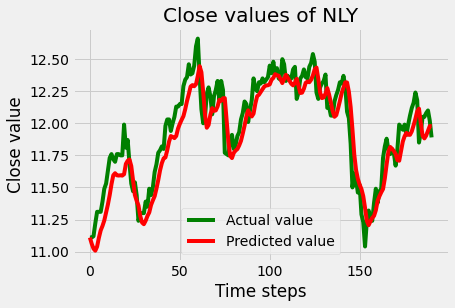

In [54]:
# Plotting actual vs predicted values
plt.plot(y_true, color='green', label='Actual value')
plt.plot(y_pred, color='red', label='Predicted value')
plt.xlabel('Time steps')
plt.ylabel('Close value')
plt.title('Close values of {}'.format(s))
plt.legend()
plt.show()

<b>Testing method 2 </b>

In [55]:
# Take 60 real values
stocks_data_value = test_close_values[0:60]

In [56]:
# Make prediction by using predicted values or combination of real values and predicted values
def make_prediction_2(stocks_data, all_data):
    stocks_data.reshape(-1,1)
    sc = MinMaxScaler(feature_range=(0,1))
    X_test = np.array(sc.fit_transform(stocks_data))
    X_test = X_test.reshape(1, X_test.shape[0], X_test.shape[1])
    result = model.predict(X_test)
    for i in range(0,len(result)):
        y = result[i]
        y = y.reshape(-1,1)
        k = sc.inverse_transform(y)
        y_pred = k[0][0]
        
    all_data.append(y_pred)
    if len(all_data) == len(test_close_values) - timesteps:
        return all_data
    else:
        new_test_data = np.append(np.delete(stocks_data,0), [y_pred]).reshape(-1,1)
        return make_prediction_2(new_test_data, all_data)

In [57]:
y_pred_2 = make_prediction_2(stocks_data_value, [])

In [58]:
y_pred_2

[11.10924,
 11.060863,
 11.006337,
 10.951499,
 10.899177,
 10.850559,
 10.8063135,
 10.766688,
 10.731627,
 10.700891,
 10.674127,
 10.650939,
 10.635395,
 10.626139,
 10.614977,
 10.606715,
 10.600322,
 10.595277,
 10.591257,
 10.588035,
 10.586486,
 10.5909605,
 10.593466,
 10.604763,
 10.612863,
 10.622899,
 10.631305,
 10.640013,
 10.648505,
 10.656578,
 10.667977,
 10.684228,
 10.694274,
 10.704843,
 10.715136,
 10.724882,
 10.733987,
 10.742425,
 10.750198,
 10.757324,
 10.76383,
 10.769749,
 10.775116,
 10.77997,
 10.784349,
 10.788291,
 10.791832,
 10.795007,
 10.797849,
 10.800389,
 10.802656,
 10.804677,
 10.806477,
 10.808077,
 10.809499,
 10.810761,
 10.811881,
 10.812874,
 10.813753,
 10.8051815,
 10.802547,
 10.796641,
 10.789185,
 10.780391,
 10.770372,
 10.759238,
 10.7476635,
 10.737942,
 10.728565,
 10.719922,
 10.712128,
 10.7052,
 10.699104,
 10.693783,
 10.689163,
 10.685169,
 10.6817255,
 10.6787615,
 10.676212,
 10.674021,
 10.672137,
 10.670999,
 10.67001,
 10.

In [63]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE

testScore = mean_squared_error(y_true, y_pred)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 0.02 MSE


### Conclusion

#### Comparation of predicted values by testing method 1, 2 and actual values

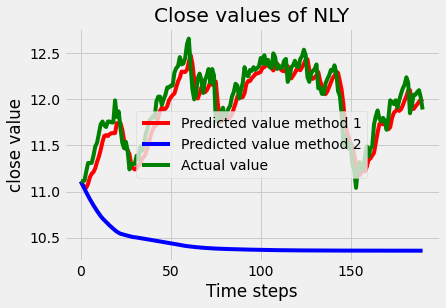

In [69]:
# Plotting graph
plt.plot(y_pred, color='red', label='Predicted value method 1')
plt.plot(y_pred_2, color='blue', label='Predicted value method 2')
plt.plot(y_true, color='green', label='Actual value')
plt.xlabel('Time steps')
plt.ylabel('close value')
plt.title('Close values of {}'.format(s))
plt.legend()
plt.show()

----

## Decision Tree Regressor

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor # Our Decision Tree classifier

#### EDA for Decision Tree Regressor

In [66]:
stocks_data.head(10)


,ticker,open,close,adj_close,low,high,volume,date
6807,CRCM,8.59,8.37,8.37,8.18,8.60,107500,2017-01-03
6813,CRCM,8.42,8.61,8.61,8.39,8.65,85500,2017-01-04
6827,CRCM,8.59,8.55,8.55,8.38,8.62,67000,2017-01-05
6835,CRCM,8.81,8.69,8.69,8.50,8.81,136600,2017-01-06
6849,CRCM,8.64,8.70,8.70,8.60,8.77,71800,2017-01-09
6855,CRCM,8.68,8.61,8.61,8.57,8.89,50600,2017-01-10
6869,CRCM,8.74,8.47,8.47,8.38,8.74,131200,2017-01-11
6876,CRCM,8.42,8.44,8.44,8.35,8.54,75200,2017-01-12
6891,CRCM,8.44,8.45,8.45,8.36,8.70,69300,2017-01-13
6897,CRCM,8.45,8.40,8.40,8.25,8.59,70300,2017-01-17


In [67]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294034 entries, 6807 to 20973724
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ticker     1294034 non-null  object 
 1   open       1294034 non-null  float64
 2   close      1294034 non-null  float64
 3   adj_close  1294034 non-null  float64
 4   low        1294034 non-null  float64
 5   high       1294034 non-null  float64
 6   volume     1294034 non-null  int64  
 7   date       1294034 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 88.9+ MB


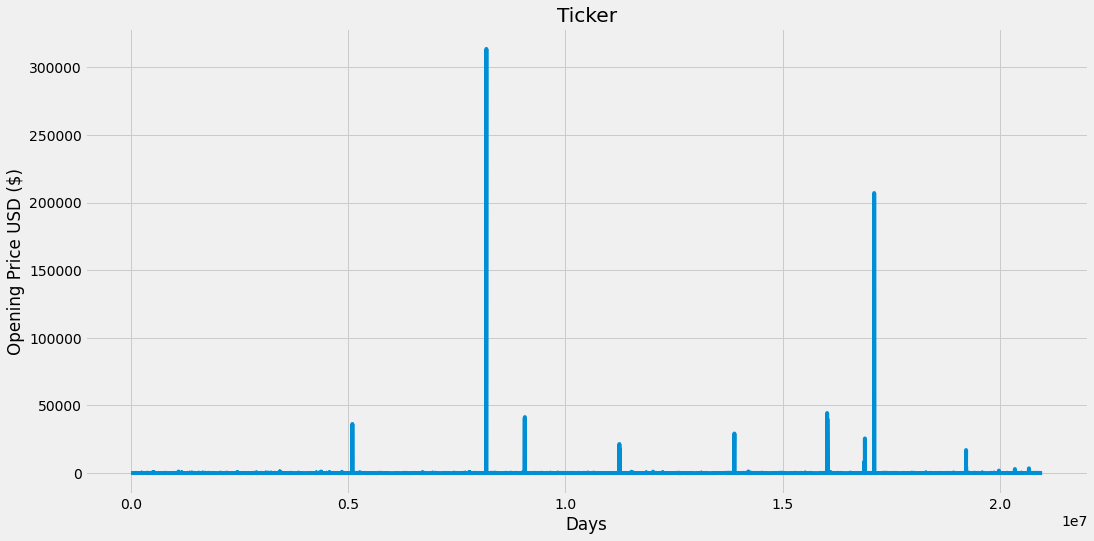

In [68]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Ticker')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(stocks_data['open'])
plt.show()

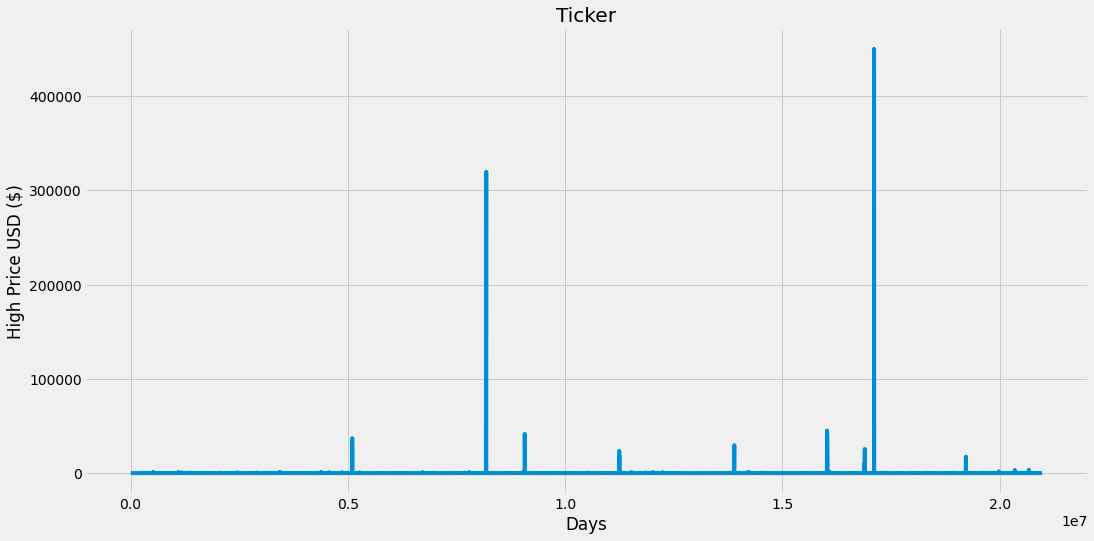

In [69]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Ticker')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(stocks_data['high'])
plt.show()

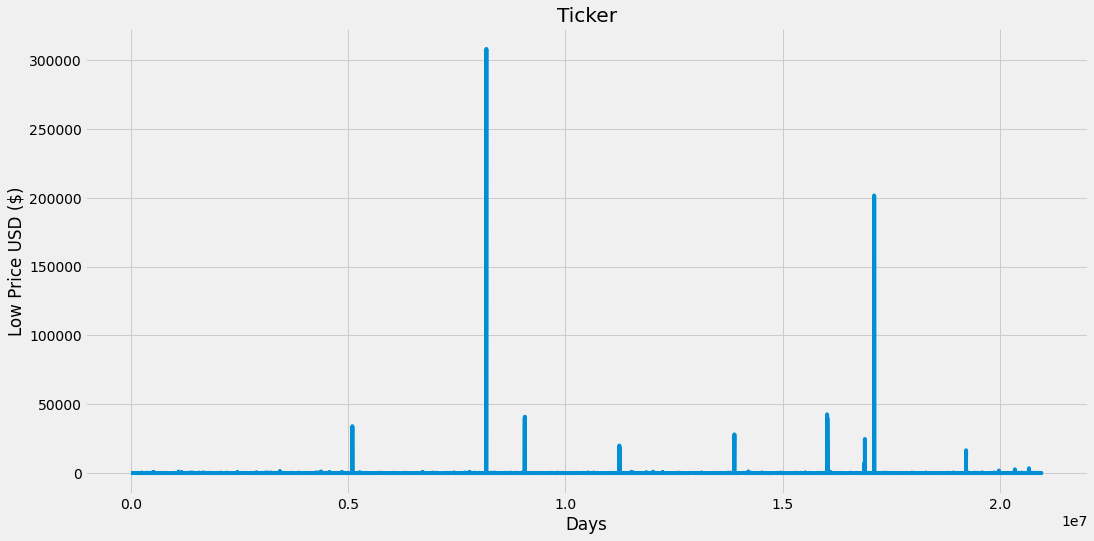

In [70]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Ticker')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(stocks_data['low'])
plt.show()

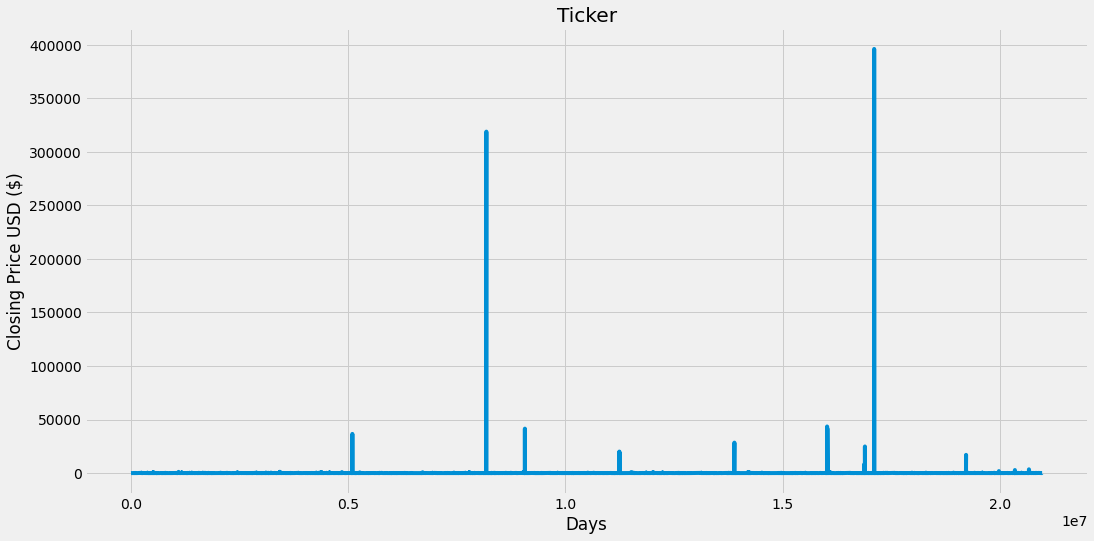

In [71]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Ticker')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(stocks_data['close'])
plt.show()

In [72]:
stock_dataFrame = stocks_data['close']

In [73]:
stock_dataFrame.tail()

20973720    15.00
20973721    15.04
20973722    15.13
20973723    15.23
20973724    15.24
Name: close, dtype: float64

In [74]:
stock_dataFrame = pd.DataFrame(stock_dataFrame)    

In [75]:
stock_dataFrame.tail()

,close
20973720,15.00
20973721,15.04
20973722,15.13
20973723,15.23
20973724,15.24


In [76]:
# Prediction 100 days into the future.
futureDays = 100
stock_dataFrame['Prediction'] = stock_dataFrame['close'].shift(-futureDays)


In [77]:
stock_dataFrame.tail()

,close,Prediction
20973720,15.00,NaN
20973721,15.04,NaN
20973722,15.13,NaN
20973723,15.23,NaN
20973724,15.24,NaN


In [78]:
X = np.array(stock_dataFrame.drop(['Prediction'], 1))[:-futureDays]
print(X)

[[ 8.36999989]
 [ 8.60999966]
 [ 8.55000019]
 ...
 [15.25      ]
 [15.27000046]
 [15.18000031]]


In [79]:
y = np.array(stock_dataFrame['Prediction'])[:-futureDays]
print(y)

[11.85000038 11.72999954 11.96000004 ... 15.13000011 15.22999954
 15.23999977]


In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)

In [81]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

<b>comparing both linear and decision tree regression </b>

In [82]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [93]:
x_future = stock_dataFrame.drop(['Prediction'], 1)[:-futureDays]
x_future = x_future.tail(futureDays)
x_future = np.array(x_future)
x_future

array([[14.07999992],
       [14.14000034],
       [14.22999954],
       [14.21000004],
       [14.19999981],
       [14.23999977],
       [14.31999969],
       [14.31999969],
       [14.38000011],
       [14.36999989],
       [14.39000034],
       [14.43000031],
       [14.43999958],
       [14.43000031],
       [14.46000004],
       [14.51000023],
       [14.55000019],
       [14.52999973],
       [14.60999966],
       [14.60999966],
       [14.65999985],
       [14.69999981],
       [14.69999981],
       [14.75      ],
       [14.72999954],
       [14.67000008],
       [14.60000038],
       [14.64000034],
       [14.71000004],
       [14.71000004],
       [14.71000004],
       [14.71000004],
       [14.72000027],
       [14.71000004],
       [14.71000004],
       [14.68999958],
       [14.67000008],
       [14.68999958],
       [14.68000031],
       [14.71000004],
       [14.77000046],
       [14.78999996],
       [14.82999992],
       [14.82999992],
       [14.80000019],
       [14

In [94]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[22.27006906 25.52240431 33.06073316 26.66054045 23.41157415 19.30842355
 28.3592892  28.3592892  29.63868059 26.99128942 27.70451277 24.3444668
 28.24630054 24.3444668  29.55965544 29.32706401 26.56838112 24.53697132
 25.12672992 25.12672992 31.26054875 24.23313931 24.23313931 23.48563278
 30.15560807 26.38819228 25.09003628 38.81624464 22.11144417 22.11144417
 22.11144417 22.11144417 29.4239824  22.11144417 22.11144417 24.45663089
 26.38819228 24.45663089 24.10139122 22.11144417 31.428691   27.89339756
 33.11388542 33.11388542 24.86165238 33.11388542 25.6512952  25.6512952
 25.21586851 24.86165238 25.6512952  27.46356694 30.29537719 27.62491918
 24.92864545 27.68829271 28.3752526  27.68829271 26.38020789 26.96213155
 27.25324954 29.18328245 28.22555953 27.62491918 27.25324954 30.29537719
 24.92864545 30.29537719 28.34042187 30.29537719 27.46356694 27.46356694
 25.6512952  26.31637761 28.22555953 30.29537719 29.18328245 27.46356694
 28.3752526  26.38020789 30.01574619 26.38020789 28.4

In [95]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[60.95395335 60.96407256 60.97925114 60.97587818 60.97419161 60.9809377
 60.99442988 60.99442988 61.0045491  61.00286253 61.00623566 61.01298175
 61.01466815 61.01298175 61.01804127 61.02647393 61.03322002 61.02984689
 61.04333907 61.04333907 61.05177172 61.05851781 61.05851781 61.06695046
 61.06357734 61.05345828 61.04165267 61.04839876 61.06020437 61.06020437
 61.06020437 61.06020437 61.06189093 61.06020437 61.06020437 61.05683125
 61.05345828 61.05683125 61.05514485 61.06020437 61.07032359 61.07369655
 61.08044264 61.08044264 61.07538311 61.08044264 61.08887529 61.08887529
 61.08550217 61.07538311 61.08887529 61.10405403 61.11080012 61.107427
 61.10911356 61.11923277 61.11417309 61.11923277 61.11754621 61.12091917
 61.10574043 61.10236747 61.10068091 61.107427   61.10574043 61.11080012
 61.10911356 61.11080012 61.11248668 61.11080012 61.10405403 61.10405403
 61.08887529 61.09562138 61.10068091 61.11080012 61.10236747 61.10405403
 61.11417309 61.11754621 61.11585965 61.11754621 61.13

In [97]:
import warnings
warnings.filterwarnings('ignore')
predictions = tree_prediction 
valid = stock_dataFrame[X.shape[0]:]
valid['Predictions'] = predictions

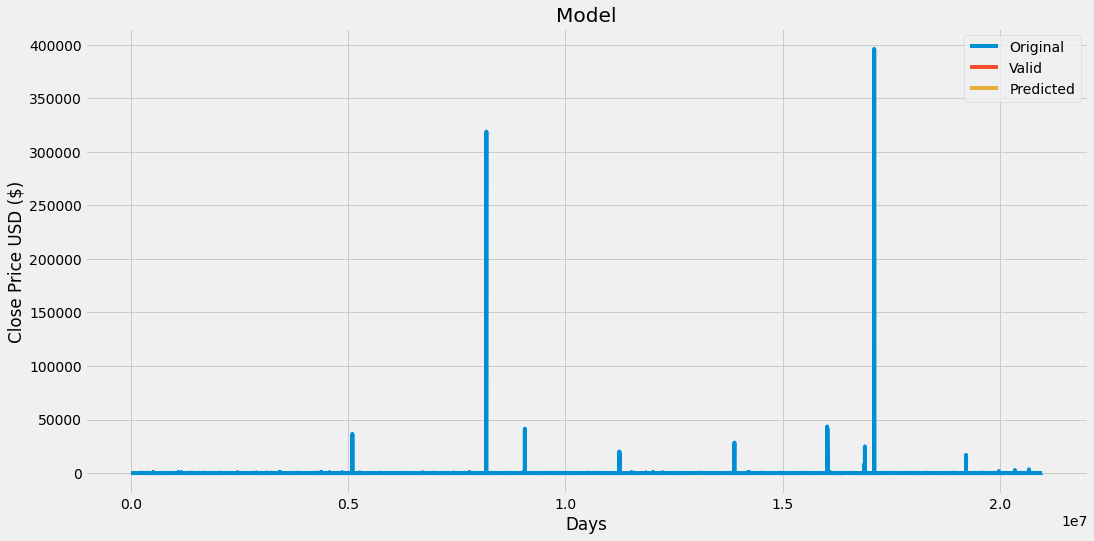

In [93]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(stock_dataFrame['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

---